# API Documentation

The functions described below are part of opyrability and are
classified based on their functionality. Each function also contains a worked
example based on the famous [Shower Problem](examples_gallery/operability_index_shower.ipynb){cite}`vinson00, lima10b`

## Conventional mapping (AIS to AOS)

### Forward mapping

```{eval-rst}
.. autofunction:: opyrability.AIS2AOS_map
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing opyrability and Numpy:

In [1]:
    from opyrability import AIS2AOS_map
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = 90
```

In [2]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds, as well as the discretization resolution:

In [3]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    resolution =  [5, 5]

Obtain discretized AIS/AOS.

[[[  0.       90.     ]
  [  2.5     120.     ]
  [  5.      120.     ]
  [  7.5     120.     ]
  [ 10.      120.     ]]

 [[  2.5      60.     ]
  [  5.       90.     ]
  [  7.5     100.     ]
  [ 10.      105.     ]
  [ 12.5     108.     ]]

 [[  5.       60.     ]
  [  7.5      80.     ]
  [ 10.       90.     ]
  [ 12.5      96.     ]
  [ 15.      100.     ]]

 [[  7.5      60.     ]
  [ 10.       75.     ]
  [ 12.5      84.     ]
  [ 15.       90.     ]
  [ 17.5      94.28571]]

 [[ 10.       60.     ]
  [ 12.5      72.     ]
  [ 15.       80.     ]
  [ 17.5      85.71429]
  [ 20.       90.     ]]]


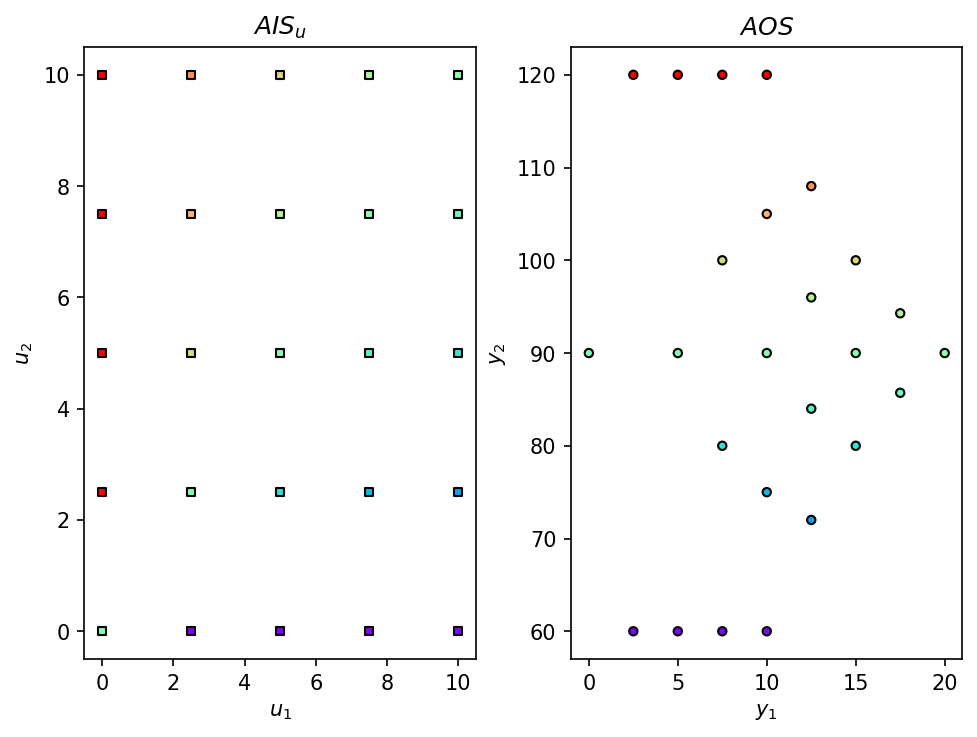

In [4]:
    AIS, AOS =  AIS2AOS_map(shower_problem, AIS_bounds,  resolution, plot = True)
    print(AOS)

### Inverse mapping (AOS/DOS to AIS/DIS)

### NLP-Based

```{eval-rst}
.. autofunction:: opyrability.nlp_based_approach
```

###### Example
Obtaining the Feasible Desired Input Set (DIS*) for the shower problem.

Importing opyrability and Numpy:

In [5]:
    import numpy as np
    from opyrability import nlp_based_approach

Defining lower and upper bound for the AIS/DIS inverse map:

In [6]:
    lb = np.array([0, 0])
    ub = np.array([100,100])

Defining DOS bounds and resolution to obtain the inverse map:

In [7]:
    DOS_bound = np.array([[15, 20],
                          [80, 100]])
    resolution = [5, 5]

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = 90
```

In [8]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Obtaining the DIS*, DOS* and the convergence for each inverse map run. 
Additionally, using IPOPT as the NLP solver, enabling plotting of the process operability
sets, cold-starting the
NLP and using finite differences:

  0%|          | 0/25 [00:00<?, ?it/s]

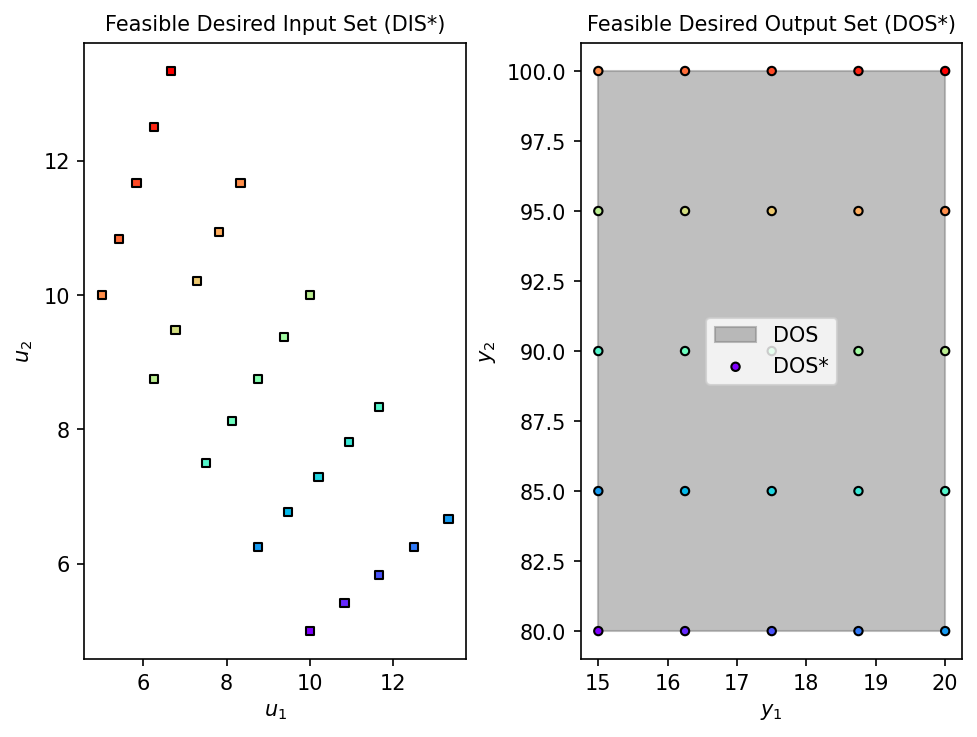

In [9]:
    u0 = u0 = np.array([0, 10]) # Initial estimate for inverse mapping.
    fDIS, fDOS, message = nlp_based_approach(shower_problem,
                                             DOS_bound, 
                                             resolution, 
                                             u0, 
                                             lb,
                                             ub, 
                                             method='ipopt', 
                                             plot=True, 
                                             ad=False,
                                             warmstart=False)

## Implicit mapping

```{eval-rst}
.. autofunction:: opyrability.implicit_map
```

## Multimodel representation

```{eval-rst}
.. autofunction:: opyrability.multimodel_rep
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing opyrability and Numpy:

In [10]:
    from opyrability import multimodel_rep
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = 90
```

In [11]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [12]:
    AIS_bounds =  np.array([[1, 10], [1, 10]])
    AIS_resolution =  [5, 5]

Obtaining multimodel representation of paired polytopes for the AOS:

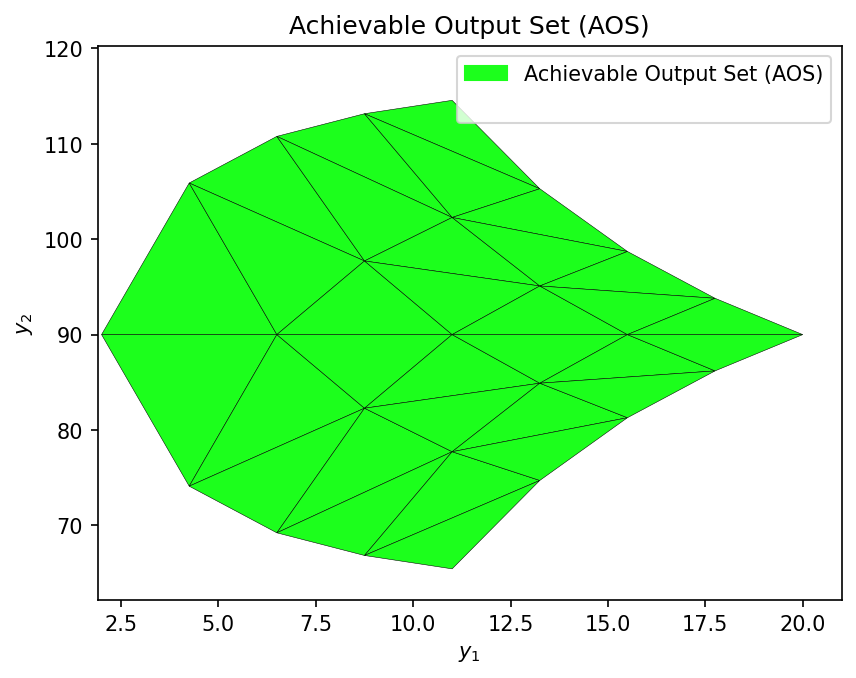

In [13]:
    AOS_region  =  multimodel_rep(shower_problem, AIS_bounds, AIS_resolution)

## OI evaluation

```{eval-rst}
.. autofunction:: opyrability.OI_eval
```

###### Example
Evaluating the OI for the shower problem for a given DOS.



Importing opyrability and Numpy:

In [14]:
    from opyrability import multimodel_rep, OI_eval
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = 90
```

In [15]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [16]:
    AIS_bounds =  np.array([[1, 10], [1, 10]])
    AIS_resolution =  [10, 10]

Obtaining multimodel representation of paired polytopes for the AOS:

In [17]:
    AOS_region  =  multimodel_rep(shower_problem, AIS_bounds, AIS_resolution,
    plot=False)

Either plot is not possible (dimension > 3) or you have chosen plot=False. The operability set is still returned as a polytopic region of general dimension.


Defining a DOS region between $y_1 =[10-20], y_2=[70-100]$

In [18]:
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

Evaluating the OI and seeing the intersection between the operability sets:

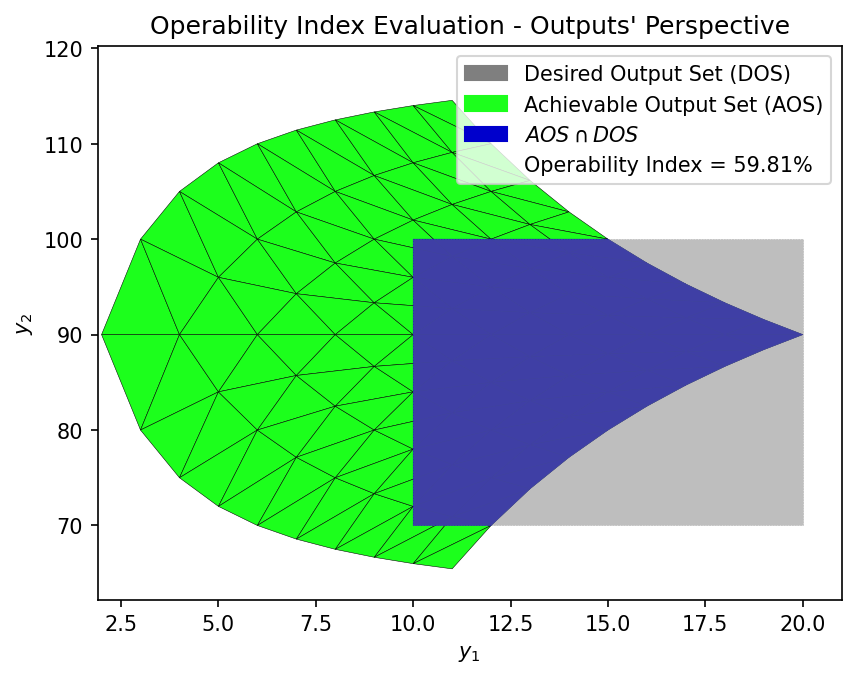

In [19]:
    OI = OI_eval(AOS_region, DOS_bounds)

## Utilities

```{eval-rst}
.. autofunction:: opyrability.create_grid
```
###### Example
Creating a 2-dimensional discretized rectangular grid for given DOS bounds.

In [20]:
    from opyrability import create_grid

    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

    DOS_resolution =  [3, 3]

    DOS_points = create_grid(DOS_bounds, DOS_resolution)

    print(DOS_points)

[[[ 10.  70.]
  [ 10.  85.]
  [ 10. 100.]]

 [[ 15.  70.]
  [ 15.  85.]
  [ 15. 100.]]

 [[ 20.  70.]
  [ 20.  85.]
  [ 20. 100.]]]


Visualizing this grid:

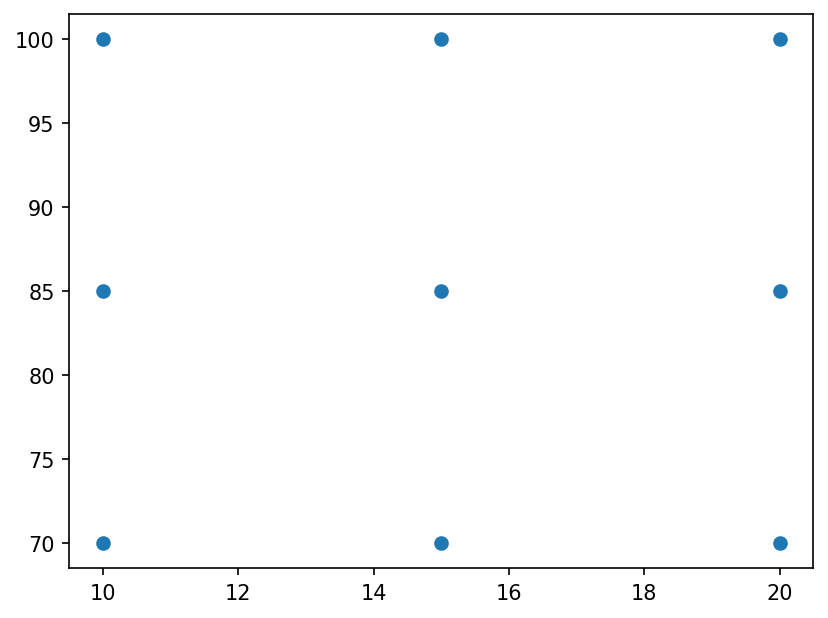

In [21]:
    import matplotlib.pyplot as plt

    DOS_points = DOS_points.reshape(-1, 2)

    plt.scatter(DOS_points[:, 0], DOS_points[:, 1])

```{eval-rst}
.. autofunction:: opyrability.points2simplices
```

###### Example
Generating paired simplicial polytopes for the AIS/AOS generated for the
shower problem example.

In [22]:
    from opyrability import points2simplices

    AIS_poly, AOS_poly = points2simplices(AIS,AOS)

    print('AIS Simplices \n', AIS_poly)
    print('AOS Simplices \n', AOS_poly)

AIS Simplices 
 [array([[0. , 0. ],
       [0. , 2.5],
       [2.5, 2.5]]), array([[0. , 0. ],
       [2.5, 0. ],
       [2.5, 2.5]]), array([[2.5, 0. ],
       [2.5, 2.5],
       [5. , 2.5]]), array([[2.5, 0. ],
       [5. , 0. ],
       [5. , 2.5]]), array([[5. , 0. ],
       [5. , 2.5],
       [7.5, 2.5]]), array([[5. , 0. ],
       [7.5, 0. ],
       [7.5, 2.5]]), array([[ 7.5,  0. ],
       [ 7.5,  2.5],
       [10. ,  2.5]]), array([[ 7.5,  0. ],
       [10. ,  0. ],
       [10. ,  2.5]]), array([[0. , 2.5],
       [0. , 5. ],
       [2.5, 5. ]]), array([[0. , 2.5],
       [2.5, 2.5],
       [2.5, 5. ]]), array([[2.5, 2.5],
       [2.5, 5. ],
       [5. , 5. ]]), array([[2.5, 2.5],
       [5. , 2.5],
       [5. , 5. ]]), array([[5. , 2.5],
       [5. , 5. ],
       [7.5, 5. ]]), array([[5. , 2.5],
       [7.5, 2.5],
       [7.5, 5. ]]), array([[ 7.5,  2.5],
       [ 7.5,  5. ],
       [10. ,  5. ]]), array([[ 7.5,  2.5],
       [10. ,  2.5],
       [10. ,  5. ]]), array([[0. , 5.

```{eval-rst}
.. autofunction:: opyrability.points2polyhedra
```
###### Example
Generating paired polyhedrons for the AIS/AOS generated for the
shower problem example.

In [23]:
    from opyrability import points2polyhedra
    
    AIS_poly, AOS_poly = points2polyhedra(AIS,AOS)

    print('AIS Polyhedrons \n', AIS_poly)
    print('AOS Polyhedrons \n', AOS_poly)

AIS Polyhedrons 
 [array([[0. , 0. ],
       [0. , 2.5],
       [2.5, 0. ],
       [2.5, 2.5]]), array([[2.5, 0. ],
       [2.5, 2.5],
       [5. , 0. ],
       [5. , 2.5]]), array([[5. , 0. ],
       [5. , 2.5],
       [7.5, 0. ],
       [7.5, 2.5]]), array([[ 7.5,  0. ],
       [ 7.5,  2.5],
       [10. ,  0. ],
       [10. ,  2.5]]), array([[0. , 2.5],
       [0. , 5. ],
       [2.5, 2.5],
       [2.5, 5. ]]), array([[2.5, 2.5],
       [2.5, 5. ],
       [5. , 2.5],
       [5. , 5. ]]), array([[5. , 2.5],
       [5. , 5. ],
       [7.5, 2.5],
       [7.5, 5. ]]), array([[ 7.5,  2.5],
       [ 7.5,  5. ],
       [10. ,  2.5],
       [10. ,  5. ]]), array([[0. , 5. ],
       [0. , 7.5],
       [2.5, 5. ],
       [2.5, 7.5]]), array([[2.5, 5. ],
       [2.5, 7.5],
       [5. , 5. ],
       [5. , 7.5]]), array([[5. , 5. ],
       [5. , 7.5],
       [7.5, 5. ],
       [7.5, 7.5]]), array([[ 7.5,  5. ],
       [ 7.5,  7.5],
       [10. ,  5. ],
       [10. ,  7.5]]), array([[ 0. ,  7.5],


## Polytopic manipulations (advanced and internal use)

The functions below are fundamental for operability calculations, though typical 
users won't need to directly interact with them. They play a crucial role within
opyrability without requiring user intervention, but are documented here 
nevertheless.

```{eval-rst}
.. autofunction:: opyrability.get_extreme_vertices
```

```{eval-rst}
.. autofunction:: opyrability.process_overlapping_polytopes
```

```{eval-rst}
.. autofunction:: opyrability.are_overlapping
```

### API documentation list
```{eval-rst}
.. autosummary::
   :toctree: _autosummary
   :recursive:

   opyrability
```